$$\bar{g}(x) = \mathbf{E}_{D}[g^{(D)}(x)] $$
Since H consists of the functions in the form h(x) = ax + b, we choose the line that passes through the two data points 
$(x_{1}, y_{1})$ and $(x_{2}, y_{2})$

The Equation of a line that passes through a point is $ y - y_{1} = a(x - x_{1})$
where a is the slope of the line. We can find the slope from two the points: 

a = $(\frac{x_{2}^2-x_{1}^2}{x_{2}-x_{1}})$
$ = x_{1} + x_{2} $

$ \hat{y} - x_{1}^2  = (x_{1} + x_{2})(x - x_{1})$

$ \hat{y} = (x_{1} + x_{2})(x - x_{1}) + x_{1}^2 $

$         = x_{1}x - x_{1}^2 + x_{2}x - x_{2}x_{1} + x_{1}^2 $

$         = x_{1}x + x_{2}x - x_{2}x_{1} $

$         = (x_{1}+ x_{2})x - x_{2}x_{1} $

$ \bar{g}(x) = \mathbf{E}_{D}[ (x_{1}+ x_{2})x - x_{2}x_{1} ] $

$= \mathbf{E}_{x_{1}, x_{2}}[(x_{1}+ x_{2})x - x_{2}x_{1} ] $

$= {\displaystyle \int_{x_{1} = -1}^{+1} \int_{x_{2} = -1}^{+1} [(x_{1}+ x_{2})x - x_{2}x_{1} ]*p(x_{1})*p(x_{2}) \,dx_{1}dx_{2}} $

$= \frac{1}{2}*\frac{1}{2}{\displaystyle \int_{x_{1} = -1}^{+1} \int_{x_{2} = -1}^{+1} [ (x_{1}+ x_{2})x - x_{2}x_{1}] \,dx_{2}dx_{1}} $

$=0 $





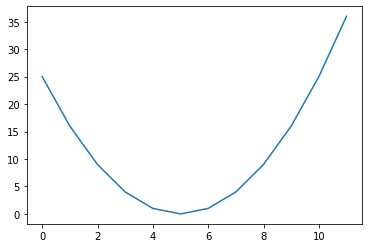

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(12)
y = np.square(x - 5)
plt.plot(x,y)
plt.show()

In [ ]:
 g¯(x) Given Xi ∼ U nif orm[−1, 1] and g¯(x) has two points (x1 , f (x1 )) and X 2 −X 2 (x2 , f (x2 )), let g¯(x) = ED [Ax + B], where A = X11 −X22 = X1 + X2 equation of straight line: (X1 + X2 )(x − X1 ) + X12 B = = (X1 + X2 )x − X1 X2 −X1 X2 (1) Knowing ED [Xi ] = 0 g¯(x) = ED [(X1 + X2 )x − X1 X2 ] = (ED [X1 ] + ED [X2 ]x − ED [X1 ]ED [X2 ] = 0 (2) b) Describe an experiment that you could run to determine (numerically) g¯(x), Eout , bias, and var. Given Xi ∼ U nif orm[−1, 1] and g¯(x) has two points (x1 , f (x1 )) and X 2 −X 2 (x2 , f (x2 )), let g¯(x) = ED [Ax + B], where A = X11 −X22 = X1 + X2 and B= X12 −X22 X1 −X2 · −X1 + X12 library('ggplot2'); #generating datasets with N=500 samples uniform between [-1, 1] N=500; set.seed(1234); g = data.frame(x1=runif(N,min = -1,max = 1),x2=runif(N,min = 1, max=1)); g$y1 = g$x1^2; g$y2 = g$x2^2; 1 Figure 1: Plotting the g(x) function #finding equation of line (as in the question 1) g$a = (g$y1-g$y2)/(g$x1-g$x2); g$b = g$a*(-g$x1)+g$y1; #plotting lines draw the figure with the ggplot(data = g, aes(x1,y1)) + xlab('x') geom_abline(aes(slope = a, intercept = stat_function(fun=function(x)x^2, size g function with generated samples + ylab('y') + b), colour = "gray") + = 1); #finding gbar g$aBar = mean(g$a); g$bBar = mean(g$b); #generate test set from population N=10000 uniform between[-1,1] f = data.frame(X=runif(10000,min = -1, max = 1)); #finding sd for each point for the plot f$sd = sapply(f$X, function(x) sd(g$a * x + g$b)); f$mean = sapply(f$X, function(x) mean(x*g$a + g$b)); #finding +sd and -sd for each point f$up=f$mean+f$sd; f$low=f$mean-f$sd; 2 Figure 2: Plotting g¯(x) and f (x) c) Run your experiment and report the results. Compare Eout with bias+var. Provide a plot of your do (on the same plot). #plot gBar+-sd draw the gBar with -sd result ggplot(data = f, aes(X) ) + xlab('x') +ylab('y') + geom_ribbon(aes(ymin=low,ymax=up),fill='grey80') + geom_abline(data = g, aes(slope = mean(a), intercept = mean(b)), colour='red', size = stat_function(fun=function(x) {x^2}, size = 1) + annotate("text",x=0,y=0.2, label='f(x)', parse=TRUE,size=5) + annotate("text",x=0,y=-0.2, label='bar(g)(x)', colour='red', parse=TRUE,size=5); #find E_out for each D apply the equation used in the first question g$Eout = mapply(function(x,y) mean((x*f$X+y-(f$X)^2)^2), g$a, g$b); #find E[E_out] apply the equation used in the first question mean(g$Eout); #find bias apply the equation used in the first question mean((g$aBar*f$X+g$bBar-f$X^2)^2) g$varx = mapply(function(x,y) mean((x*f$X+y-g$aBar*f$X-g$bBar)^2), g$a, g$b); mean(g$varx) • Eout 0.5334265 3 • bias 0.1977489 • var 0.3356776 d) Compute analytically what Eout , bias and var should be. Bias = = = Ex [(¯ g (x) − f (x))2 ] Z 1 4 x dx −1 2 1 5 V ar = Ex ED [(gD (x) − g¯(x))2 ], gD (x) = (X1 + X2 )x − X1 X2 2 ED [(gD (x)) ] Z = = = = 1 Z (3) (4) 1 1 ((y + z)x − yz)2 dydz (5) 4 −1 −1 Z Z 1 1 1 (y + z)2 x2 − 2xyz(y + z) + y 2 z 2 dydz 4 −1 −1 Z 1 1 x2 (z + 1)3 − 4zx + 2z 2 − x2 (z − 1)3 dz 12 −1 2x2 1 3 9 Ex [ 2x2 1 = 3 9 Z ( −1 = = 4 2x2 1 1 ) dx 3 9 2 (6) 1 3 = Eout 1 1 1 + 5 3 8 15 (7) ...